In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pip install openpyxl --upgrade
pd.set_option('display.max_columns', None)

In [2]:
stn_names = pd.read_excel('Data/station-names.xls')
stn_names.head()

,Unnamed: 0,Two-Letter Station Code,Station Name
0,NaN,RM,Richmond
1,NaN,EN,El Cerrito Del Norte
2,NaN,EP,El Cerrito Plaza
3,NaN,NB,North Berkeley
4,NaN,BK,Berkeley


In [3]:
downtown_SF_stns = np.array(['EM', 'MT', 'PL', 'CC'])  # Montgomery, Powell St, Civic Center

In [4]:
jan2019 = pd.read_excel('Data/ridership_2019/Ridership_201901.xlsx')
dwntwnSF_jan2019 = jan2019[['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29']].iloc[1:]
dwntwnSF_jan2019 = dwntwnSF_jan2019.rename(columns={'Unnamed: 26':'EM', 'Unnamed: 27':'MT', 'Unnamed: 28':'PL', 'Unnamed: 29':'CC'})
sums_jan2019 = np.array(np.sum(dwntwnSF_jan2019)) # rider entry sums across all stations
sums_jan2019

array([81936.5714285714, 86109.61904761907, 56924.952380952374,
       46029.04761904762], dtype=object)

In [5]:
jan2022 = pd.read_excel('Data/ridership_2022/Ridership_202201.xlsx')
dwntwnSF_jan2022 = jan2022[['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29']].iloc[1:]
dwntwnSF_jan2022 = dwntwnSF_jan2022.rename(columns={'Unnamed: 26':'EM', 'Unnamed: 27':'MT', 'Unnamed: 28':'PL', 'Unnamed: 29':'CC'})
sums_jan2022 = np.array(np.sum(dwntwnSF_jan2022))
sums_jan2022

array([11327.999999999998, 10255.428571428569, 14372.952380952378,
       10294.761904761905], dtype=object)

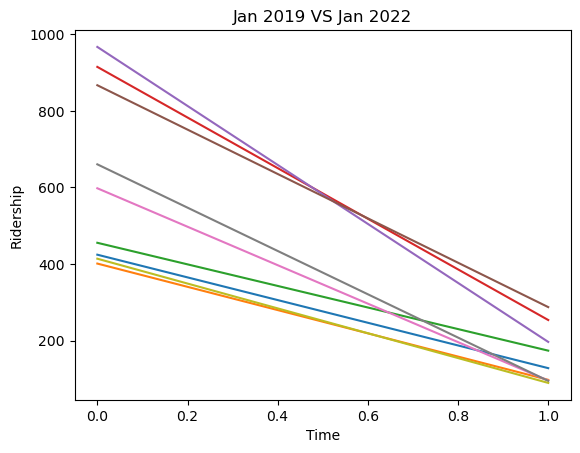

In [6]:
for i in np.arange(3):
    for j in np.arange(3):
        plt.plot([dwntwnSF_jan2019.iloc[i,j], dwntwnSF_jan2022.iloc[i,j]])
        plt.ylabel('Ridership')
        plt.xlabel('Time')
        plt.title('Jan 2019 VS Jan 2022')

## Mapping

In [7]:
percent_diffs = (sums_jan2022 - sums_jan2019) / sums_jan2019
colors = np.array(['crimson', 'orange', 'green', 'blue'])

In [8]:
# @source: https://www.python-graph-gallery.com/313-bubble-map-with-folium
import folium

# Make an empty map
m = folium.Map(location=[37.78656375,-122.4051605], tiles="cartodbpositron", zoom_start=15)

In [9]:
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lon':[-122.3970, -122.401942, -122.4080, -122.4137],
   'lat':[37.7929, 37.789355, 37.7844, 37.7796],
   'name':['Embarcadero', 'Montgomery Street', 'Powell Street', 'Civic Center'],
   'value': percent_diffs
}, dtype=str)

data

,lon,lat,name,value
0,-122.397,37.7929,Embarcadero,-0.8617467169727105
1,-122.401942,37.789355,Montgomery Street,-0.8809026368383158
2,-122.408,37.7844,Powell Street,-0.7475105067323394
3,-122.4137,37.7796,Civic Center,-0.7763420614311872


In [10]:
# add marker one by one on the map
for i in range(0,len(data)):
    folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      tooltip=data.iloc[i]['name'],
      radius=float(data.iloc[i]['value'])*-380,
      color=colors[i],
      fill=True,
      fill_color=colors[i]
   ).add_to(m)

# Show the map again
m